# Descenso del gradiente


## Gonzalo Carretero Ursúa


## Índice de contenidos
* [1. Introducción](#item1)
* [2. Librerías](#item2)
* [3. Datos](#item3)
* [4. Diagrama de dispersión](#item4)
* [5. Función de activación o Función Sigmoide](#item5)
* [6. Función de Costes](#item6)
* [7. Descenso del Gradiente](#item7)
* [8. Gráfico Convergencia](#item8)
* [9. Probabilidad Aprobar](#item9)




<a name="item1"></a>
### 1. Introducción

El método del descenso del gradiente es un proceso que va realizando iteraciones o actualizaciones sobre una función de costes o error. Es común su uso para el entrenamiento de redes neuronales.

El objetivo para el que se utiliza el descenso del gradiente es para encontrar la combinación de parámetros con el error o coste mínimo global.

<a name="item2"></a>
### 2. Librerías 

In [113]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a name="item3"></a>
### 3. Datos

In [114]:
data = pd.read_csv('../data/4_1_data.csv')
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


En este caso tenemos dos variables de predicción (score-1, score-2) y la variable respuesta, que es label (Aprobado o Suspenso).

In [162]:
data.shape

(100, 3)

In [158]:
scores = data[['score-1', 'score-2']].values
results = data['label'].values

<a name="item4"></a>
### 4. Diagrama de dispersión

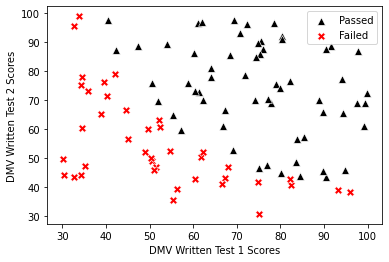

In [116]:
# La función reshape nos devuelve un array con booleanos en función de la condición escrita anteriormente
passed = (results == 1).reshape(100, 1) # En este caso la condición es que en la columna label tenga el valor 1
failed = (results == 0).reshape(100, 1) # Aqui la condición es que la columna label sea igual a 0

ax = sns.scatterplot(x = scores[passed[:, 0], 0], # Crea el gráfico para los aprobados, es decir, label = 1
                     y = scores[passed[:, 0], 1],
                     marker = "^", # Marker nos permite seleccionar la forma en la que se representan los puntos
                     color = "black", # Color para los aprobados
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0], # En este apartado los crea los puntos que corresponden a los suspensos
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores") # Títulos de los ejes
ax.legend(["Passed", "Failed"])
plt.show();

El gráfico de dispersión visualiza las combinaciones de puntuaciones en los test que tenemos en el dataset. Un triángulo negro significa que está aprobado (label = 1) y una cruz roja significa que esta suspenso (label = 0).

<a name="item5"></a>
### 5. Función de activación o Función Sigmoide


La función sigmoide nos dice la forma de relación que tienen los parámetros. Regresión logística.

In [147]:
def Sigmoid(x):    # Creamos nosotros la función Sigmoide.
    return 1/ (1 + np.exp(-x)) # np.exp representa la constante exponencial,'e'

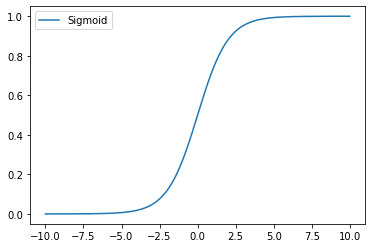

In [148]:
x = np.linspace(-10, 10, 1000) # Eje de abcisas 
y1 = Sigmoid(x) # El eje de ordenadas nos indicará los valores de la función Sigmoide [0,1]

plt.plot(x, y1, label='Sigmoid')
plt.legend(loc='upper left')
plt.show()

<a name="item6"></a>
###  6. Función de Costes

La función de costes indica la relación de los parámetros y el error o coste que tiene dicha combinación. El objetivo es encontrar el mínimo error posible. Por tanto es el "mapa" por el cuál se irá moviendo el gradiente buscando combinaciones posibles.

In [139]:
def Cost(theta, x, y):  
    m = len(y) # m nos indica el número de datos que tenemos
    y_pred = Sigmoid(np.dot(x , theta)) # np.dot multiplica
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error) # Este es el valor que estamos buscando minimizar
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient 

<a name="item7"></a>
###  7. Descenso del Gradiente

El gradiente va realizando combinaciones, en nuestro caso de dos parámetros, hasta encontrar el punto mínimo de la función de costes, lo que significa que el error es mínimo. Va realizando actualizaciones (iteraciones), nosotros le indicamos el número, hasta encontrar el mínimo. Lo que avanza en cada una de estas actualizaciones es lo que conocemos cómo la tasa de aprendizaje.
La tasa de aprendizaje no debe de ser muy pequeña, ya que podría quedarse estancado en un mínimo local, por tanto no encontraría el mínimo absoluto, ni tampoco muy grande, ya que daría pasos demasiado grandes y podría no llegar a encontrar el mínimo.

In [151]:
# Theta: Combinación de parámetros
# Alpha es el ratio de aprendizaje 
# Iterations: número de actualziaciones que queremos que haga el gradiente
def Gradiente(x, y, theta, alpha, iterations): # Al crear la función del gradiente debemos indicar la tasa de
    costs = []                                 # de aprendizaje y las iteraciones que queramos que realice.
    for i in range(iterations):
        cost, Gradiente = Cost(theta, x, y) 
        theta -= (alpha * Gradiente)
        costs.append(cost)
    return theta, costs # Nos devuelve la combinación con el mínimo cost

### 9. Punto Inicial

En este apartado indicamos los valores del punto de partida.
Sirve para indicar a la función del gradiente, cuando la vayamos a utilizar, el punto desde el que tiene que iniciarse. 
(No es estrictamente necesario para poder ejecutar el código)

In [152]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores # Tipificar o estandarizar la variable scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = Cost(theta_init, X, y)

print("Coste", cost)
print("Gradiente:", gradient) 

Coste 0.693147180559946
Gradiente: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [122]:
theta, costs = Gradiente(X, y, theta_init, 1, 200) # El 1 es la tasa de aprendizaje (alpha), 200 son las iteraciones
# En este caso selecciona el punto de inicio creado en el apartado anterior.

In [ ]:
# Podemos jugar con el número de iteraciones y la tasa de aprendizaje del descenso del gradiente. Pero
# hay que evitar tasas muy pequeñas o muy elevadas cómo comente anteriormente.

In [123]:
print("Theta", theta) # Combinación de parámetros del gradiente, en este caso, cómo tenemos dos parámetros más
# el valor de la pendiente que sigue el gradiente para encontrar el mínimo. Por tanto, tres ejes.
print("Coste:", costs[-1]) # Nos devuelve el coste mínimo global

Theta [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Coste: 0.20489382036036602


El resultado indica la combinación de los parámetros y el resultado del coste mínimo con el número de iteraciones y la tasa de aprendizaje que hemos escogido.

<a name="item8"></a>
### 8. Gráfico de convergencia

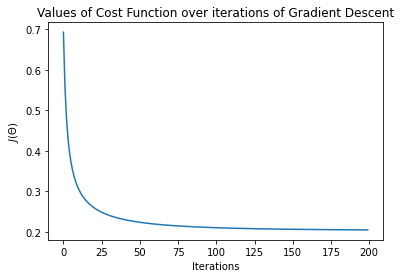

In [146]:
plt.plot(costs)
plt.xlabel("Iterations") # El número de iteraciones que decidamos poner eje x
plt.ylabel("$J(\Theta)$") # La combinación de parámetros en la función de costes será el eje y
plt.title("Values of Cost Function over iterations of Gradient Descent");

Nos representa el valor de la función de costes en función del número de iteraciones que introduzcamos en el gradiente. Podemos observar que a mayor número de iteraciones menor será el valor de la función de costes.

<a name="item9"></a>
### 9. Probabilidad Aprobar


In [130]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0 

In [131]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [142]:
test = np.array([40,90]) # Estos valores son escogidos al azar. El primer valor es la puntuación del primer test
test = (test - mean_scores)/std_scores    # El segundo número es el valor del segundo test.
test = np.append(np.ones(1), test)
probability = Sigmoid(test.dot(theta))
print(np.round(probability[0], 2))

0.74


Esto nos da la probabilidad de aprobar (passed == 1) con los valores que hemos seleccionado